## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


## read the data

In [2]:
df = pd.read_csv('sberbank.csv')

## Shape and data types of the data

In [3]:
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


## Select numeric columns

In [4]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)


['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

## select non numeric columns

In [5]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


## Missing data

### Technique #1: Missing Data Heatmap


<AxesSubplot:>

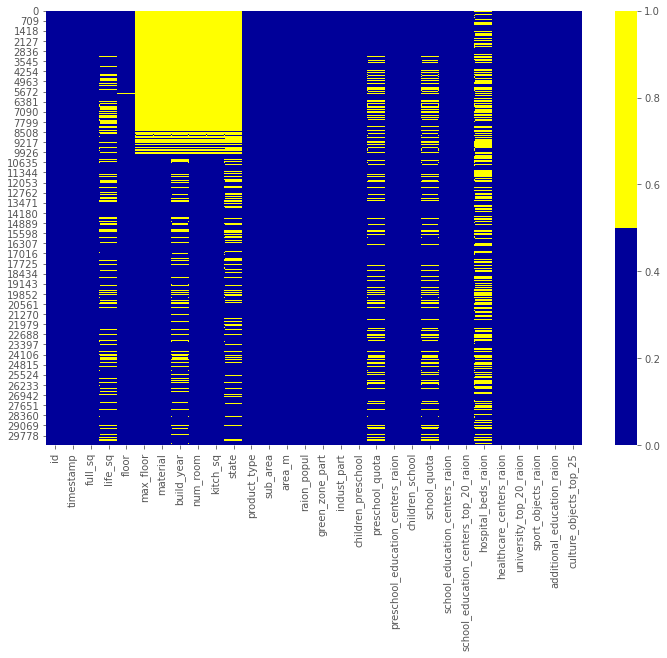

In [6]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### Technique #2: Missing Data Percentage List

In [7]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0

### Technique #3: Missing Data Histogram

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

<AxesSubplot:xlabel='index'>

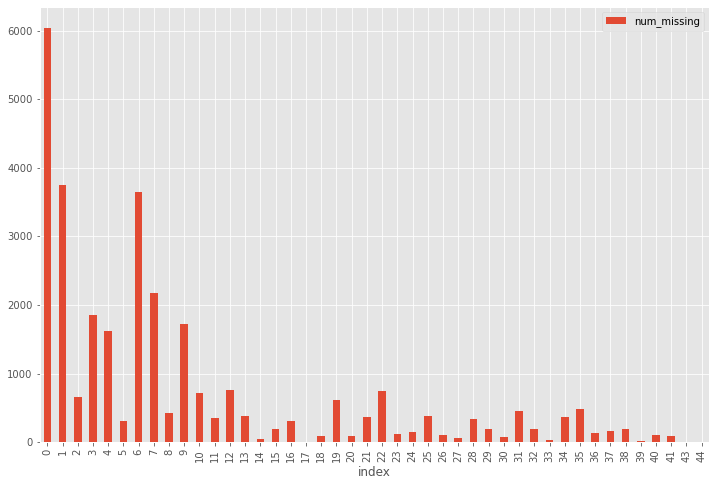

In [8]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


## Solutions for handling missing data

### Solution #1: Drop the Observation

In [9]:
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

### Solution #2: Drop the Feature

In [10]:
# hospital_beds_raion has a lot of missing.
# If we want to drop.
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

### Solution #3: Impute the Missing


In [11]:
# replace missing values with the median.
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


Moreover, we can apply the same imputation strategy for all the numeric features at once.

In [12]:

# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before

Luckily, our dataset has no missing value for categorical features. Yet, we can apply the mode imputation strategy for all the categorical features at once.


In [13]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

### Solution #4: Replace the Missing

In [14]:
# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')


# numeric
df['life_sq'] = df['life_sq'].fillna(-999)

## Irregular data (Outliers)
   

### Technique #1: Histogram/Box Plot

<AxesSubplot:>

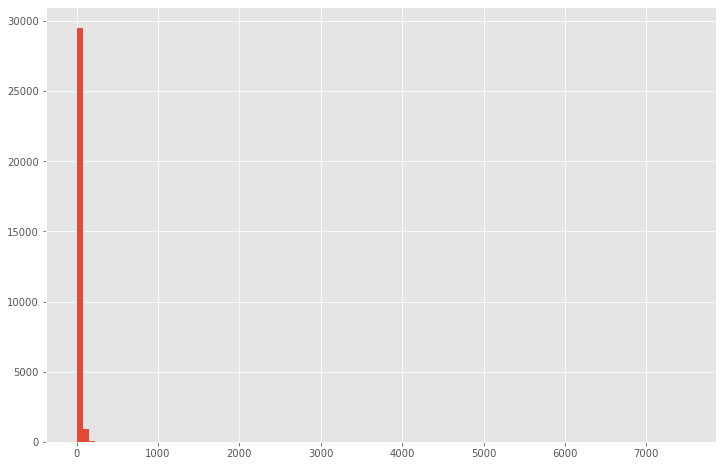

In [15]:
# histogram of life_sq.
df['life_sq'].hist(bins=100)

The data looks highly skewed with the possible existence of outliers.
histogram outlier
Histogram
To study the feature closer, let’s make a box plot.

<AxesSubplot:>

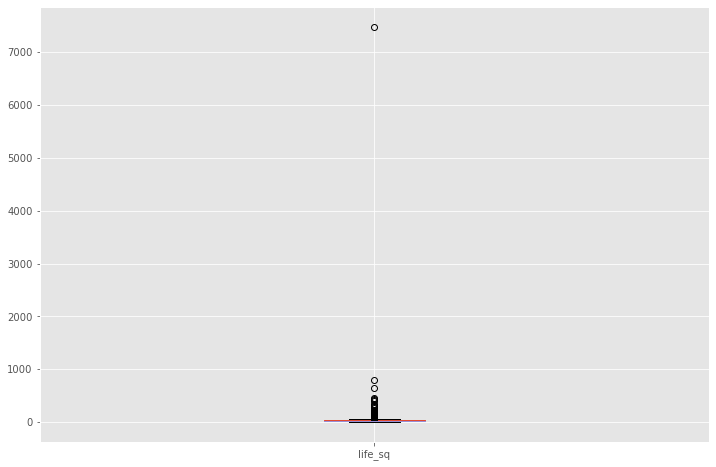

In [17]:
# box plot.
df.boxplot(column=['life_sq'])

In this plot, we can see there is an outlier at a value of over 7000.

### Technique #2: Descriptive Statistics

In [18]:
df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

### Technique #3: Bar Chart

<AxesSubplot:>

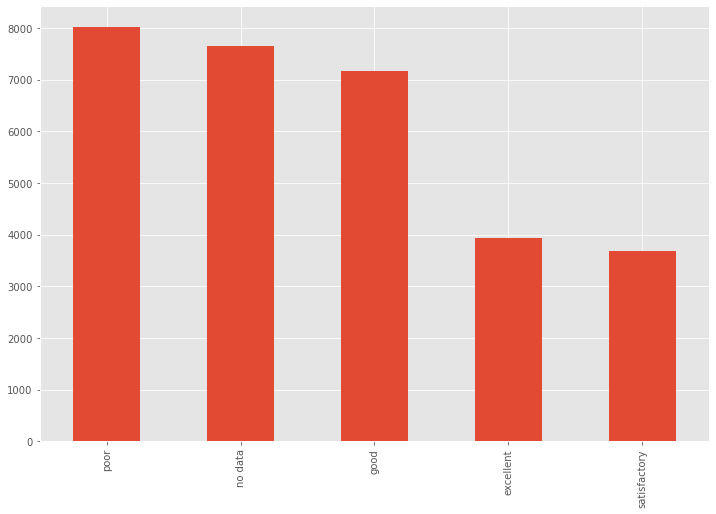

In [19]:
# bar chart -  distribution of a categorical variable
df['ecology'].value_counts().plot.bar()

    Other Techniques: Many other techniques can spot outliers as well, such as scatter plot, z-score, and clustering. 
    This article does not cover all of those.

## Solution to handle outlier

    The methods of handling outliers are somewhat similar to missing data. We either drop or adjust or keep them. We can 
    refer back to the missing data section for possible solutions.
    

## Unnecessary data
    
#### Unnecessary type #1: Uninformative / Repetitive

In [20]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosq

We can look into these variables one by one to see whether they are informative or not. We won’t show the details here.

### Unnecessary type #2: Irrelevant
    The data needs to provide valuable information for the project. If the features are not related to the question we are 
    trying to solve in the project, they are irrelevant.
    How to find out?
    We need to skim through the features to identify irrelevant ones.
    For example, a feature recording the temperature in Toronto doesn’t provide any useful insights to predict Russian
    housing prices.
    What to do?
    When the features are not serving the project’s goal, we can remove them.
    

### Unnecessary type #3: Duplicates
    The duplicate data is when copies of the same observation exist.
    There are two main types of duplicate data.
##### Duplicates type #1: All Features based
    

In [20]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


10 rows are being complete duplicate observations.

####    Duplicates type #2: Key Features based

In [21]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2013-12-18  39       30.0     6.0    1979.0      1.0       3700946      2
2015-03-30  41       41.0     11.0   2016.0      1.0       4114580      2
2015-03-14  62       30.0     2.0    1979.0      2.0       6520500      2
2013-12-05  40       30.0     5.0    1979.0      1.0       4414080      2
2013-06-24  40       30.0     12.0   1979.0      2.0       4112800      2
2013-08-30  40       30.0     12.0   1979.0      1.0       4462000      2
2014-12-09  40       30.0     17.0   1979.0      1.0       4607265      2
2012-08-27  59       30.0     6.0    1979.0      2.0       4506800      2
2014-04-15  134      134.0    1.0    0.0         3.0       5798496      2
2013-09-23  85       30.0     14.0   1979.0      3.0       7725974      2
2014-01-22  46       28.0     1.0    1968.0      2.0       3000000      2
2014-12-17  62       30.0     9.0    1979.0      2.0       6552000      2
2012-10-22  61       30.0     18.0   1979.0

There are 16 duplicates based on this set of key features.


What to do?
We can drop these duplicates based on the key features.

In [22]:
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 344)
(30455, 344)


We dropped the 16 duplicates within the new dataset named df_dedupped2.

# Thank You!